# **Etapa 1: Recopilación y Preparación de Datos (Clases 1 a 4)**

In [176]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format


**1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.**

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
os.listdir('/content/drive/MyDrive/Fernández Emilia - Comisión 25262 - TPI Data Analytics')

['ventas.csv', 'clientes.csv', 'marketing.csv', 'ventas.gsheet']

In [11]:
df_ventas = pd.read_csv('/content/drive/MyDrive/Fernández Emilia - Comisión 25262 - TPI Data Analytics/ventas.csv')
df_ventas.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [12]:
df_clientes = pd.read_csv('/content/drive/MyDrive/Fernández Emilia - Comisión 25262 - TPI Data Analytics/clientes.csv')
df_clientes.head()

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


In [13]:
df_marketing = pd.read_csv('/content/drive/MyDrive/Fernández Emilia - Comisión 25262 - TPI Data Analytics/marketing.csv')
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


**2. Realizar un script básico que calcule las ventas mensuales utilizando variables y operadores.**

In [14]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [15]:
df_ventas.duplicated(subset=['id_venta'], keep='first').sum()

np.int64(35)

In [16]:
df_ventas_sd_calculo = df_ventas.drop_duplicates(subset=['id_venta'], keep='first').copy()
df_ventas_sd_calculo.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [17]:
#Eliminar $
df_ventas_sd_calculo['precio'] = df_ventas_sd_calculo['precio'].str.replace('$', '')

# Cambiar la columna 'precio' a tipo float
df_ventas_sd_calculo['precio'] = df_ventas_sd_calculo['precio'].astype(float)

# Cambiar la columna fecha por formato fecha
df_ventas_sd_calculo['fecha_venta'] = pd.to_datetime(df_ventas_sd_calculo['fecha_venta'], format='%d/%m/%Y', errors='coerce')

# Cambiar la columna 'cantidad' a tipo float y nulos en 0
df_ventas_sd_calculo['cantidad'] = df_ventas_sd_calculo['cantidad'].fillna(0).astype(int)

df_ventas_sd_calculo.head()


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos


In [18]:
df_ventas_sd_calculo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     3000 non-null   int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 164.1+ KB


In [19]:
print('Total de ventas mensuales: ')
df_ventas_sd_calculo.groupby(df_ventas_sd_calculo['fecha_venta'].dt.to_period('M'))['precio'].sum()

Total de ventas mensuales: 


,precio
fecha_venta,
2024-01,20097.34
2024-02,18578.62
2024-03,20078.93
2024-04,20497.69
2024-05,21445.87
2024-06,16835.01
2024-07,18184.12
2024-08,19226.95
2024-09,17793.47


**3. Estructuras de Datos: Desarrollar un programa que almacene los datos de ventas (producto, precio, cantidad). Decidir si conviene utilizar diccionarios o listas.**

In [20]:
datos_ventas_diccionario = []

for producto in df_ventas_sd_calculo.itertuples():
    datos = {
        'producto': producto.producto,
        'precio': producto.precio,
        'cantidad': producto.cantidad
    }

    datos_ventas_diccionario.append(datos)

print("Estructura de Lista de Diccionarios")
# print(datos_ventas_diccionario)

Estructura de Lista de Diccionarios
[{'producto': 'Cuadro decorativo', 'precio': 69.94, 'cantidad': 5}, {'producto': 'Lámpara de mesa', 'precio': 105.1, 'cantidad': 5}, {'producto': 'Secadora', 'precio': 97.96, 'cantidad': 3}, {'producto': 'Heladera', 'precio': 114.35, 'cantidad': 8}, {'producto': 'Secadora', 'precio': 106.21, 'cantidad': 4}, {'producto': 'Horno eléctrico', 'precio': 35.35, 'cantidad': 9}, {'producto': 'Plancha de vapor', 'precio': 65.43, 'cantidad': 2}, {'producto': 'Proyector', 'precio': 88.17, 'cantidad': 9}, {'producto': 'Rincón de plantas', 'precio': 79.86, 'cantidad': 11}, {'producto': 'Candelabro', 'precio': 66.11, 'cantidad': 8}, {'producto': 'Aspiradora', 'precio': 95.9, 'cantidad': 5}, {'producto': 'Freidora eléctrica', 'precio': 111.18, 'cantidad': 1}, {'producto': 'Aspiradora', 'precio': 70.91, 'cantidad': 2}, {'producto': 'Proyector', 'precio': 43.62, 'cantidad': 11}, {'producto': 'Tablet', 'precio': 67.97, 'cantidad': 9}, {'producto': 'Tablet', 'precio': 

**4. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames**

In [21]:
def eda (df, nombre):
  print(f'---------- {nombre} ----------')
  print('***Cantidad de filas y columnas del DataFrame***')
  df_filas_columnas = df.shape
  print(f'Cantidad de filas: {df_filas_columnas[0]}')
  print(f'Cantidad de columnas: {df_filas_columnas[1]}')
  print('***Nombre de las columnas y tipo de dato***')
  df_nombres_tipos_columnas = df.dtypes
  print(df_nombres_tipos_columnas)
  print('***Primeras 5 filas del DataFrame***')
  df_primeras_filas = df.head(5)
  print(df_primeras_filas)
  print('***Ultimas 5 filas del DataFrame***')
  df_ultimas_filas = df.tail(5)
  print(df_ultimas_filas)
  print('***Valores nulos por columna***')
  df_valores_nulos = df.isna().sum()
  print(df_valores_nulos)
  print('***Resumen estadístico del DataFrame***')
  df_resumen_estadistico = df.describe()
  print(df_resumen_estadistico)

In [22]:
  eda(df_ventas, 'VENTAS')

---------- VENTAS ----------
***Cantidad de filas y columnas del DataFrame***
Cantidad de filas: 3035
Cantidad de columnas: 6
***Nombre de las columnas y tipo de dato***
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object
***Primeras 5 filas del DataFrame***
   id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  
***Ultimas 5 filas del DataFrame***
      id_venta                producto   precio  cantidad fecha_venta  \
303

In [23]:
  eda(df_clientes, 'CLIENTES')

---------- CLIENTES ----------
***Cantidad de filas y columnas del DataFrame***
Cantidad de filas: 567
Cantidad de columnas: 5
***Nombre de las columnas y tipo de dato***
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
***Primeras 5 filas del DataFrame***
   id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65
***Ultimas 5 filas del DataFrame***
     id_cliente           nombre  edad       ciudad  ingresos
562         563    Dione Forsyde    29      Posadas  26757.73
563         564      Fleming Gow    39     Santa Fe  43674.96
564         565  Jewelle Mabbett    33      Córdob

In [24]:
  eda(df_marketing, 'MARKETING')

---------- MARKETING ----------
***Cantidad de filas y columnas del DataFrame***
Cantidad de filas: 90
Cantidad de columnas: 6
***Nombre de las columnas y tipo de dato***
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object
***Primeras 5 filas del DataFrame***
   id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12           Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32  Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21       Smartphone   RRSS   6.37   29/03/2024  16/05/2024
4           58         Alfombra  Email   4.25   31/03/2024  05/05/2024
***Ultimas 5 filas del DataFrame***
    id_campanha            producto  canal  costo fecha_inicio   fecha_fin
85           70          Aspiradora     TV   3.06   13/12/2024  29/12/2024
86           89       

**5. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.**

In [25]:
#Eliminar duplicados y nulos

def eliminar_duplicados_nulos (df, subset):
  df_copy = df.copy()

  print(f"Filas antes de limpieza: {df_copy.shape[0]}")

  duplicados = df_copy.duplicated(subset=subset, keep='first').sum()
  print(f"Duplicados encontrados: {duplicados}")

  df_copy = df_copy.drop_duplicates(subset=subset, keep='first').copy()
  print(f"Filas después de eliminar duplicados: {len(df_copy)}")

  nulos = df_copy.isnull().any(axis=1).sum()
  print(f"Filas con nulos encontrados: {nulos}")

  df_copy = df_copy.dropna().copy()
  print(f"Filas después de eliminar nulos: {len(df_copy)}")

  print("\n*** VERIFICACIÓN FINAL DE LIMPIEZA ***")

  duplicados_final = df_copy.duplicated(subset=subset, keep='first').sum()
  print(f"Duplicados restantes: {duplicados_final}")

  nulos_final = df_copy.isnull().sum().sum()
  print(f"Nulos restantes: {nulos_final}")

  return df_copy

In [26]:
eliminar_duplicados_nulos(df_ventas, 'id_venta')

Filas antes de limpieza: 3035
Duplicados encontrados: 35
Filas después de eliminar duplicados: 3000
Filas con nulos encontrados: 2
Filas después de eliminar nulos: 2998

*** VERIFICACIÓN FINAL DE LIMPIEZA ***
Duplicados restantes: 0
Nulos restantes: 0


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos
...,...,...,...,...,...,...
3030,1837,Horno eléctrico,$104.12,9.0,30/12/2024,Electrodomésticos
3031,2276,Laptop,$85.27,9.0,30/12/2024,Electrónica
3032,2696,Laptop,$107.81,4.0,30/12/2024,Electrónica
3033,2913,Smartphone,$99.85,7.0,30/12/2024,Electrónica


In [27]:
eliminar_duplicados_nulos(df_clientes, 'id_cliente')

Filas antes de limpieza: 567
Duplicados encontrados: 0
Filas después de eliminar duplicados: 567
Filas con nulos encontrados: 0
Filas después de eliminar nulos: 567

*** VERIFICACIÓN FINAL DE LIMPIEZA ***
Duplicados restantes: 0
Nulos restantes: 0


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65
...,...,...,...,...,...
562,563,Dione Forsyde,29,Posadas,26757.73
563,564,Fleming Gow,39,Santa Fe,43674.96
564,565,Jewelle Mabbett,33,Córdoba,30522.64
565,566,Lauri Munns,23,Resistencia,31259.14


In [28]:
eliminar_duplicados_nulos(df_marketing, 'id_campanha')

Filas antes de limpieza: 90
Duplicados encontrados: 0
Filas después de eliminar duplicados: 90
Filas con nulos encontrados: 0
Filas después de eliminar nulos: 90

*** VERIFICACIÓN FINAL DE LIMPIEZA ***
Duplicados restantes: 0
Nulos restantes: 0


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024
...,...,...,...,...,...,...
85,70,Aspiradora,TV,3.06,13/12/2024,29/12/2024
86,89,Televisor,TV,4.98,13/12/2024,8/2/2025
87,68,Rincón de plantas,TV,5.81,17/12/2024,14/2/2025
88,33,Secadora,Email,3.80,20/12/2024,7/1/2025


# **Etapa 2: Preprocesamiento y Limpieza de Datos (Clases 5 a 8)**

**1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.**

In [29]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 7.6 MB/s eta 0:00:00


In [30]:
#Funcion para eliminar ñ, acentos, utilizando unidecode

import unidecode as un

def eliminar_acentos(txt):
  return un.unidecode(str(txt))

In [31]:
# Limpieza de datos

def limpieza_datos (df, subset):
  df_copy = df.copy()

  print(f"Filas antes de limpieza: {df_copy.shape[0]}")

  duplicados = df_copy.duplicated(subset=subset, keep='first').sum()
  print(f"Duplicados encontrados: {duplicados}")

  df_copy = df_copy.drop_duplicates(subset=subset, keep='first').copy()
  print(f"Filas después de eliminar duplicados: {len(df_copy)}")

  nulos = df_copy.isnull().any(axis=1).sum()
  print(f"Filas con nulos encontrados: {nulos}")

  df_copy = df_copy.dropna().copy()
  print(f"Filas después de eliminar nulos: {len(df_copy)}")

  print("\n*** VERIFICACIÓN FINAL DE LIMPIEZA ***")

  duplicados_final = df_copy.duplicated(subset=subset, keep='first').sum()
  print(f"Duplicados restantes: {duplicados_final}")

  nulos_final = df_copy.isnull().sum().sum()
  print(f"Nulos restantes: {nulos_final}")

  str_cols = df_copy.select_dtypes(include=['object', 'string']).columns
  for col in str_cols:
        df_copy[col] = (df_copy[col].astype(str).str.lower().str.strip().apply(eliminar_acentos))

  return df_copy

In [32]:
df_ventas_copy = limpieza_datos(df_ventas, 'id_venta')

Filas antes de limpieza: 3035
Duplicados encontrados: 35
Filas después de eliminar duplicados: 3000
Filas con nulos encontrados: 2
Filas después de eliminar nulos: 2998

*** VERIFICACIÓN FINAL DE LIMPIEZA ***
Duplicados restantes: 0
Nulos restantes: 0


In [33]:
df_cliente_copy = limpieza_datos(df_clientes, 'id_cliente')

Filas antes de limpieza: 567
Duplicados encontrados: 0
Filas después de eliminar duplicados: 567
Filas con nulos encontrados: 0
Filas después de eliminar nulos: 567

*** VERIFICACIÓN FINAL DE LIMPIEZA ***
Duplicados restantes: 0
Nulos restantes: 0


In [34]:
df_marketing_copy = limpieza_datos(df_marketing, 'id_campanha')

Filas antes de limpieza: 90
Duplicados encontrados: 0
Filas después de eliminar duplicados: 90
Filas con nulos encontrados: 0
Filas después de eliminar nulos: 90

*** VERIFICACIÓN FINAL DE LIMPIEZA ***
Duplicados restantes: 0
Nulos restantes: 0


**2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.**

In [35]:
#Eliminar $
df_ventas_copy['precio'] = df_ventas_copy['precio'].str.replace('$', '')

# Cambiar la columna 'precio' a tipo float
df_ventas_copy['precio'] = df_ventas_copy['precio'].astype(float)

# Cambiar la columna fecha por formato fecha
df_ventas_copy['fecha_venta'] = pd.to_datetime(df_ventas_copy['fecha_venta'], format='%d/%m/%Y', errors='coerce')

# Cambiar la columna 'cantidad' a tipo float y nulos en 0
df_ventas_copy['cantidad'] = df_ventas_copy['cantidad'].fillna(0).astype(int)

df_ventas_copy.head()

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,cuadro decorativo,69.94,5,2024-01-02,decoracion
1,811,lampara de mesa,105.10,5,2024-01-02,decoracion
2,1156,secadora,97.96,3,2024-01-02,electrodomesticos
3,1372,heladera,114.35,8,2024-01-02,electrodomesticos
4,1546,secadora,106.21,4,2024-01-02,electrodomesticos


In [36]:
df_ventas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 164.0+ KB


In [37]:
# Ingreso por registro
df_ventas_copy['ingreso'] = df_ventas_copy["precio"] * df_ventas_copy["cantidad"]

# Agrupar por producto y sumar los ingresos
df_ingreso_por_producto = df_ventas_copy.groupby('producto')['ingreso'].sum().reset_index()

# Calculo del percentil
p80_ingreso_total = df_ingreso_por_producto['ingreso'].quantile(0.8)

print(f"\nP80 de Ingreso Total: ${p80_ingreso_total:,.2f}")

# Filtrar el alto rendimient
df_productos_alto_rendimiento = df_ingreso_por_producto[
    df_ingreso_por_producto['ingreso'] >= p80_ingreso_total
].sort_values(by='ingreso', ascending=False)

print("\nProductos con Alto Rendimiento:")
display(df_productos_alto_rendimiento)


P80 de Ingreso Total: $52,518.85

Productos con Alto Rendimiento:


,producto,ingreso
17,lampara de mesa,82276.38
3,auriculares,74175.58
20,microondas,72562.89
5,cafetera,59607.31
10,cuadro decorativo,54297.60
26,smartphone,54132.44


**3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.**

In [38]:
# Ingreso por registro
df_ventas_copy['ingreso_total'] = df_ventas_copy["precio"] * df_ventas_copy["cantidad"]

# Agrupar por categoria para obtener ingresol y total de filas
df_ingreso_por_categoria = df_ventas_copy.groupby('categoria').agg(ingreso_total=('ingreso_total', 'sum'),total_registros=('id_venta', 'size')).reset_index()

# Calcular el Ticket Promedio por Categoría
df_ingreso_por_categoria['ticket_promedio_venta'] = (df_ingreso_por_categoria['ingreso_total'] / df_ingreso_por_categoria['total_registros'])

# Ordenar el resultado por Ticket Promedio
df_ticket_ordenado = df_ingreso_por_categoria.sort_values(by='ticket_promedio_venta', ascending=False)

print("\nAnálisis de Ingreso y Ticket Promedio por Categoría:")
display(df_ticket_ordenado)


Análisis de Ingreso y Ticket Promedio por Categoría:


,categoria,ingreso_total,total_registros,ticket_promedio_venta
1,electrodomesticos,505299.63,1000,505.29963
2,electronica,482577.80,998,483.54489
0,decoracion,479216.09,1000,479.21609


**4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.**

In [39]:
df_marketing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [40]:
# Cambiar la columna fecha por formato fecha
df_marketing_copy['fecha_inicio'] = pd.to_datetime(df_marketing_copy['fecha_inicio'], format='%d/%m/%Y', errors='coerce')
df_marketing_copy['fecha_fin'] = pd.to_datetime(df_marketing_copy['fecha_fin'], format='%d/%m/%Y', errors='coerce')
df_marketing_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [41]:
# Unión DataFrames
df_ventas_marketing = pd.merge(df_ventas_copy, df_marketing_copy, on='producto', how='left')
df_ventas_marketing.head()


,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso,ingreso_total,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,cuadro decorativo,69.94,5,2024-01-02,decoracion,349.7,349.7,1,rrss,5.27,2024-04-27,2024-06-04
1,792,cuadro decorativo,69.94,5,2024-01-02,decoracion,349.7,349.7,31,email,5.28,2024-08-15,2024-09-12
2,792,cuadro decorativo,69.94,5,2024-01-02,decoracion,349.7,349.7,61,tv,5.30,2024-11-05,2024-12-23
3,811,lampara de mesa,105.10,5,2024-01-02,decoracion,525.5,525.5,32,email,5.54,2024-03-28,2024-04-20
4,811,lampara de mesa,105.10,5,2024-01-02,decoracion,525.5,525.5,2,rrss,5.88,2024-05-30,2024-06-29


In [42]:
# Agrupar por campaña para obtener ingreso total y ventas
ingreso_por_campanha = df_ventas_marketing.groupby('id_campanha').agg(ingreso_total=('ingreso_total', 'sum'), ventas=('id_venta', 'size')).reset_index()

# Ordenar el resultado por Ingreso Total
df_campanhas_ordenado = ingreso_por_campanha.sort_values(
    by='ingreso_total',
    ascending=False,
    na_position='last',
    ignore_index=True
)

print("\nIngreso total y ventas por campaña:")
display(df_campanhas_ordenado.head(10))


Ingreso total y ventas por campaña:


,id_campanha,ingreso_total,ventas
0,2,82276.38,176
1,32,82276.38,176
2,62,82276.38,176
3,77,74175.58,143
4,47,74175.58,143
5,17,74175.58,143
6,26,72562.89,135
7,56,72562.89,135
8,86,72562.89,135
9,19,59607.31,117


In [43]:
# Agrupar por canal para para obtener ingreso total y ventas
ingreso_por_canal = df_ventas_marketing.groupby('canal').agg(ingreso_total=('ingreso_total', 'sum'), ventas=('id_venta', 'size')).reset_index()

# Ordenar el resultado por Ingreso Total
df_canal_ordenado = ingreso_por_canal.sort_values(
    by='ingreso_total',
    ascending=False,
    na_position='last',
    ignore_index=True
)

print("\nIngreso total y ventas por canal:")
display(df_canal_ordenado.head(10))


Ingreso total y ventas por canal:


,canal,ingreso_total,ventas
0,email,1467093.52,2998
1,rrss,1467093.52,2998
2,tv,1467093.52,2998


# **Etapa 3: Análisis de Datos**

**1. Estadística Descriptiva:
Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.**

Medidas de tendencia

In [62]:
# Media
#media = df_ventas_copy['ingreso_total'].mean()
media = np.mean(df_ventas_copy['ingreso_total'])
print("La media es: ", media)
# Mediana
mediana = np.median(df_ventas_copy['ingreso_total'])
print("La mediana es: ", mediana)
# Moda
moda = stats.mode(df_ventas_copy['ingreso_total']) [0]
print("La moda es: ", moda)

La media es:  489.35741160773847
La mediana es:  418.065
La moda es:  345.33


Medidas de dispersion

In [64]:
# Rango
rango = np.max(df_ventas_copy['ingreso_total']) - np.min(df_ventas_copy['ingreso_total'])
print("El rango es: ", rango)

# Varianza
varianza = np.var(df_ventas_copy['ingreso_total'])
print("La varianza es: ", varianza)

# Desviacion standard

desviacion_standard = np.std(df_ventas_copy['ingreso_total'])
print("La desviacion standard es: ", desviacion_standard)



El rango es:  1461.8200000000002
La varianza es:  111707.0600119797
La desviacion standard es:  334.2260612399633


Conclusión:

Al realizar las medidas de tendecia central y de dispersion, se ve que las ventas tiene una distrucion estable, dado que le media y la mediana tiene valores cercanos, pero la dispersion es alta,  dado que el desvio standard muestra que existen ventas que se alejan de la media.

**2. Análisis Exploratorio de Datos (EDA):
Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.**

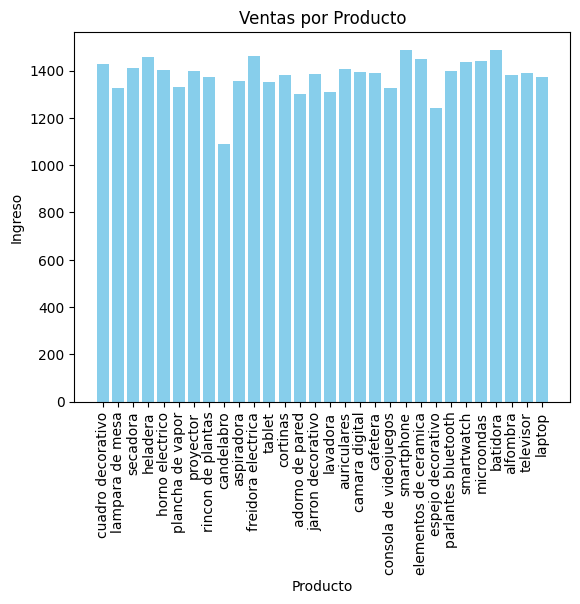

In [78]:
# Ventas por productos
plt.bar(df_ventas_copy['producto'], df_ventas_copy['ingreso'], color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Ingreso')
plt.title('Ventas por Producto')
plt.xticks(rotation=90)
plt.show();


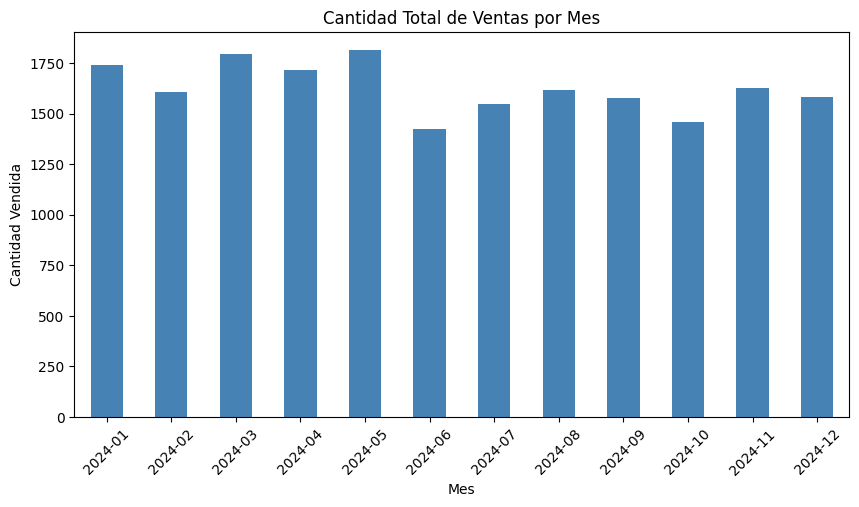

In [136]:
# Cantidad de ventas por mes

df_ventas_copy['mes'] = df_ventas_copy['fecha_venta'].dt.to_period('M')

ventas_mensuales = df_ventas_copy.groupby('mes')['cantidad'].sum()

ventas_mensuales.plot(kind='bar', figsize=(10,5), color='steelblue')
plt.title("Cantidad Total de Ventas por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.show()

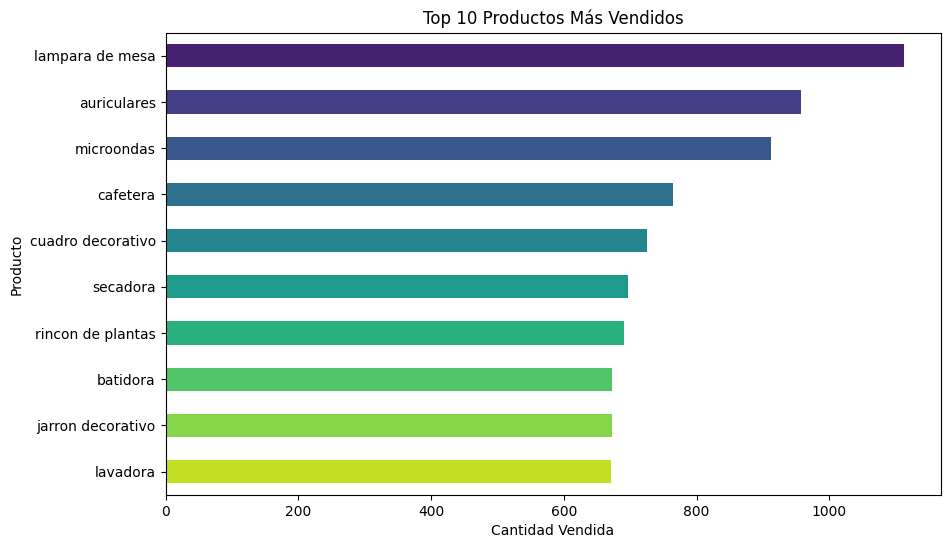

In [169]:
# 10 productos más comprados

top10 = df_ventas_copy.groupby('producto')['cantidad'].sum().sort_values(ascending=False).head(10)

colors = sns.color_palette("viridis", 10)

top10.plot(kind='barh', figsize=(10,6), color=colors)
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Producto")
plt.gca().invert_yaxis()
plt.show()

Analisis de distribucion

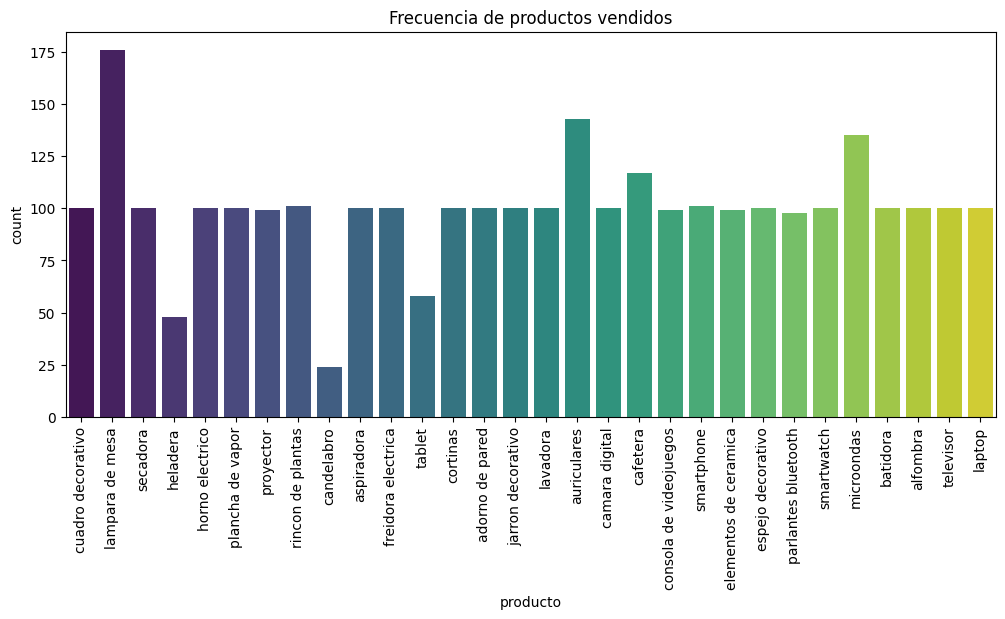

In [164]:
# Visualización de la distribución de los productos
plt.figure(figsize=(12, 5))
sns.countplot(data=df_ventas_copy, x='producto', hue='producto', palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Frecuencia de productos vendidos')
plt.show();

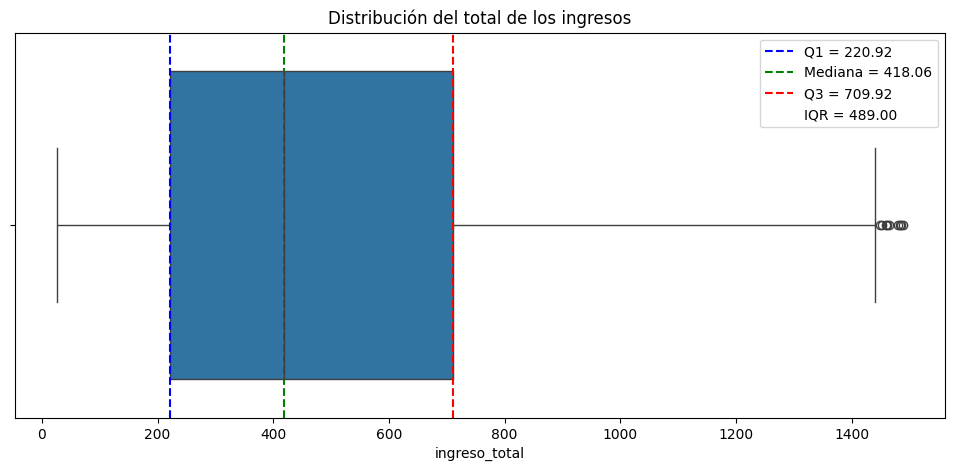

In [121]:
# Visualizar la distribución del total de ingresos
plt.figure(figsize=(12, 5))

sns.boxplot(x=df_ventas_copy['ingreso_total'])

# Calcular cuartiles
Q1 = df_ventas_copy['ingreso_total'].quantile(0.25)
Q2 = df_ventas_copy['ingreso_total'].quantile(0.50)
Q3 = df_ventas_copy['ingreso_total'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Líneas verticales
plt.axvline(Q1, color='blue', linestyle='--', label=f"Q1 = {Q1:.2f}")
plt.axvline(Q2, color='green', linestyle='--', label=f"Mediana = {Q2:.2f}")
plt.axvline(Q3, color='red', linestyle='--', label=f"Q3 = {Q3:.2f}")

plt.axvline(Q3, color='purple', linestyle='', label=f"IQR = {IQR:.2f}")

plt.legend()
plt.title("Distribución del total de los ingresos")
plt.show();

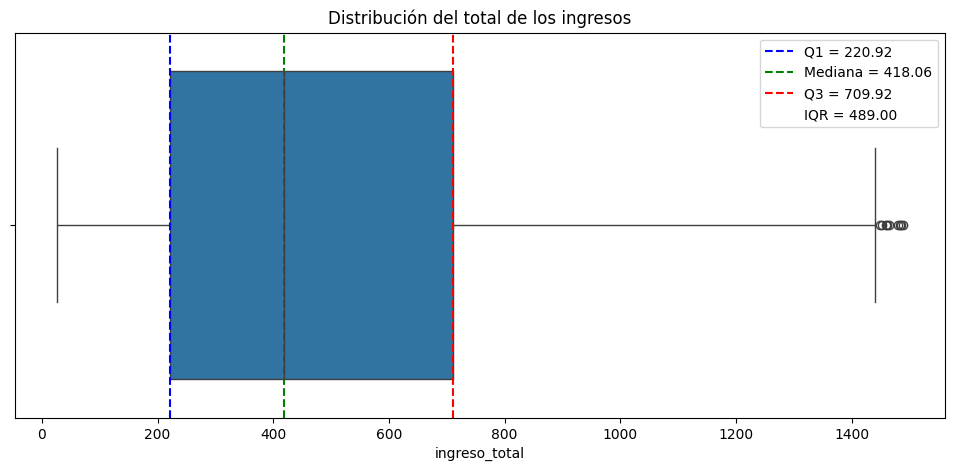

In [122]:
# Visualizar la distribución del total de ingresos
plt.figure(figsize=(12, 5))

sns.boxplot(x=df_ventas_copy['ingreso_total'])

# Calcular cuartiles
Q1 = df_ventas_copy['ingreso_total'].quantile(0.25)
Q2 = df_ventas_copy['ingreso_total'].quantile(0.50)
Q3 = df_ventas_copy['ingreso_total'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# Líneas verticales
plt.axvline(Q1, color='blue', linestyle='--', label=f"Q1 = {Q1:.2f}")
plt.axvline(Q2, color='green', linestyle='--', label=f"Mediana = {Q2:.2f}")
plt.axvline(Q3, color='red', linestyle='--', label=f"Q3 = {Q3:.2f}")

plt.axvline(IQR, color='purple', linestyle='', label=f"IQR = {IQR:.2f}")

plt.legend()
plt.title("Distribución del total de los ingresos")
plt.show();

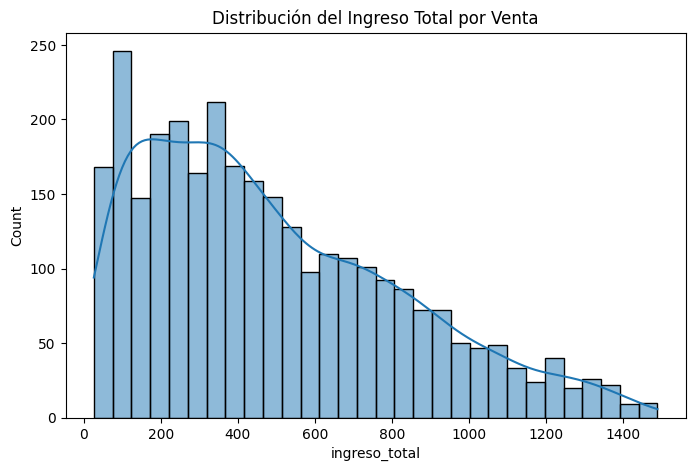

In [160]:
# Mapa de Distribución de Ingresos
plt.figure(figsize=(8,5))
sns.histplot(df_ventas_copy['ingreso_total'], kde=True, bins=30, )
plt.title("Distribución del Ingreso Total por Venta")
plt.show()

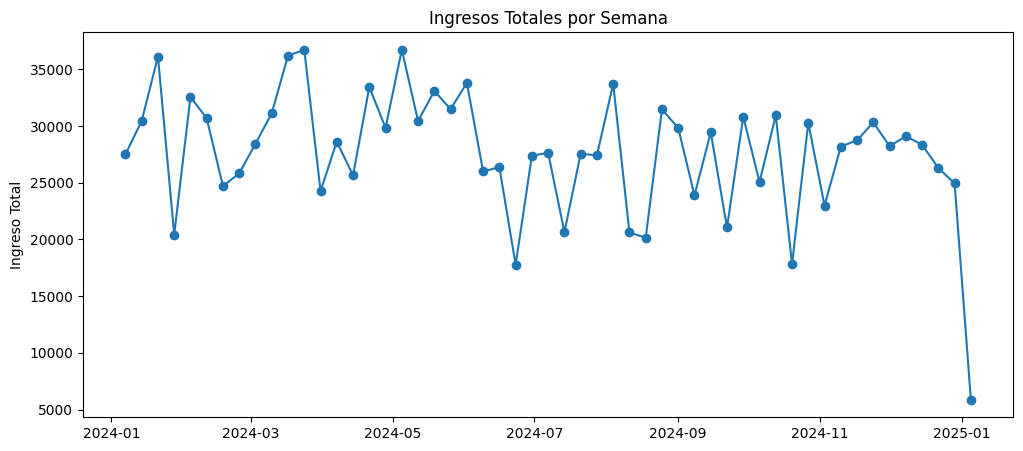

In [105]:
#Ingresos totales por semana

ventas_diarias = df_ventas_copy.groupby('fecha_venta')['ingreso_total'].sum()
ventas_semanales = ventas_diarias.resample('W').sum() # W agrupa de lunes a domingo

plt.figure(figsize=(12,5))
plt.plot(ventas_semanales, marker='o')
plt.title("Ingresos Totales por Semana")
plt.ylabel("Ingreso Total")
plt.show()

**3. Correlación:
Evaluar la relación entre diferentes variables(por ejemplo, precio y cantidad vendida) y mostrar losresultados en un gráfico.**

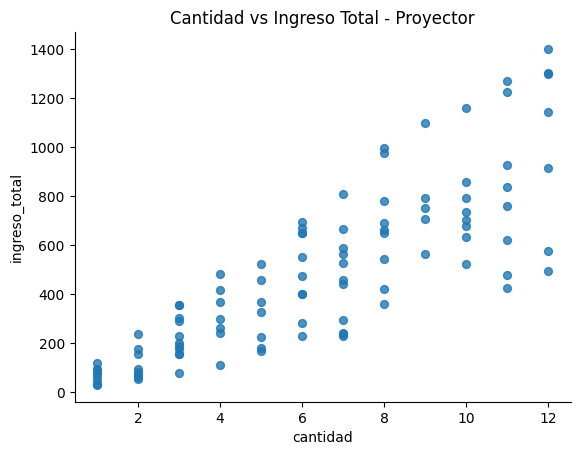

In [130]:
# Relacion entre Cantidad Vendida e Ingreso Total – Proyector

producto_filtro = df_ventas_copy[df_ventas_copy["producto"] == "proyector"]

producto_filtro.plot(kind='scatter', x='cantidad', y='ingreso_total', s=32, alpha=.8)
plt.title("Cantidad vs Ingreso Total - Proyector")
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

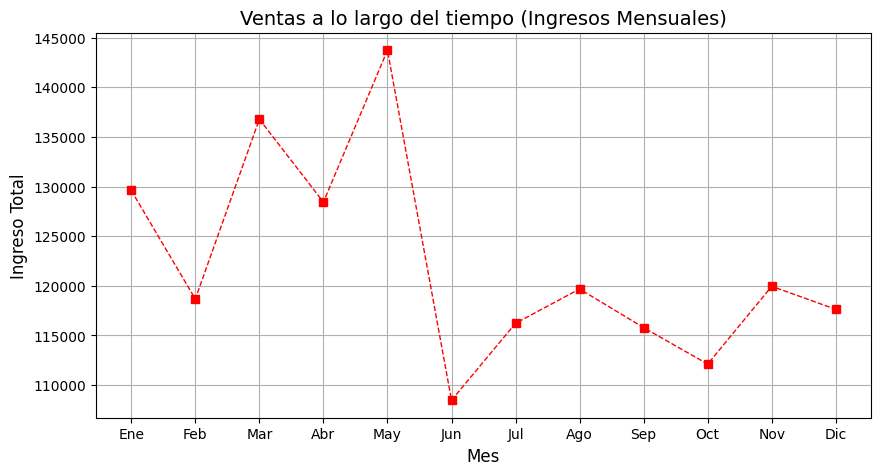

In [157]:
# Ventas a lo largo del tiempo (Ingresos Mensuales)

df_ventas_copy['mes'] = df_ventas_copy['fecha_venta'].dt.month

# Agrupar por mes y sumar ingresos
ventas_mensuales = df_ventas_copy.groupby('mes')['ingreso_total'].sum()

# Valores de x (1 a 12)
mes_labels = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

plt.figure(figsize=(10,5))
plt.plot(mes_labels, ventas_mensuales, marker='s', linestyle='--',
         color='red', linewidth=1, markersize=6)

plt.title('Ventas a lo largo del tiempo (Ingresos Mensuales)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ingreso Total', fontsize=12)
plt.grid(True)
plt.xticks(mes_labels)
plt.show()

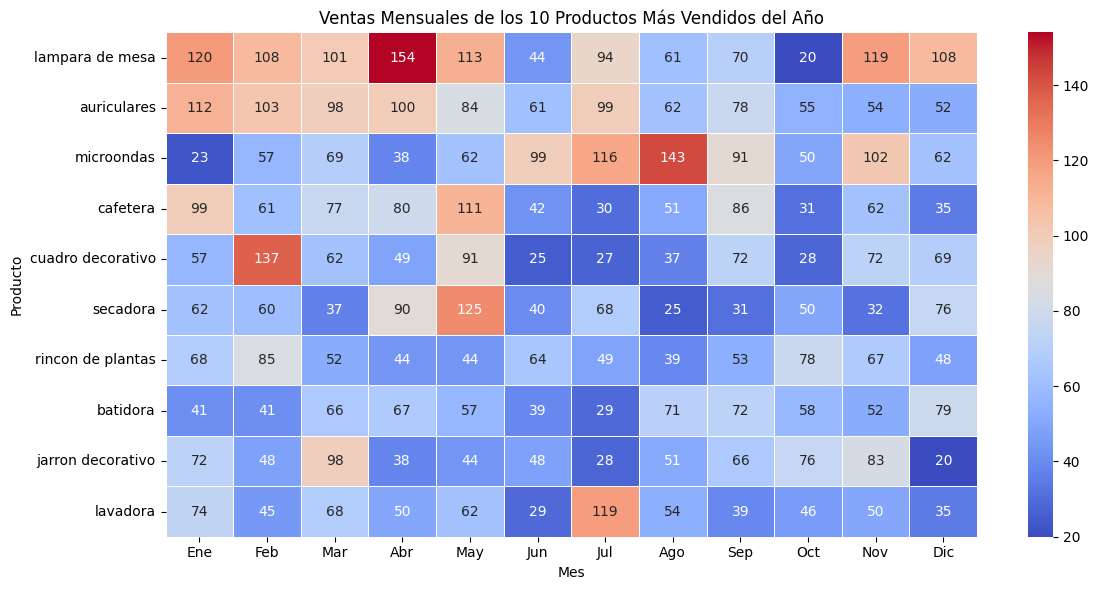

In [147]:
# Ventas Mensuales de los 10 Productos Más Vendidos del Año

df_ventas_copy['mes'] = df_ventas_copy['fecha_venta'].dt.month

# PRODUCTO x MES con CANTIDAD total vendida
pivot_mensual = df_ventas_copy.pivot_table(
    index='producto',
    columns='mes',
    values='cantidad',
    aggfunc='sum'
).fillna(0)

# Ordenar productos por total anual de ventas (de mayor a menor)
pivot_mensual = pivot_mensual.loc[
    pivot_mensual.sum(axis=1).sort_values(ascending=False).index
]

# Quedarnos solo con los 10 productos más vendidos del año
top10 = pivot_mensual.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top10 = pivot_mensual.loc[top10]

# Renombrar los meses (1,2,3 → Ene, Feb, Mar...)
mes_labels = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
pivot_top10.columns = [mes_labels[m] for m in pivot_top10.columns]

# Dibujar el heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_top10,
    cmap='coolwarm',
    linewidths=.5,
    annot=True,      # mostrar valores en las celdas
    fmt='.0f'        # evita la notación científica (muestra enteros)
)

plt.title("Ventas Mensuales de los 10 Productos Más Vendidos del Año")
plt.xlabel("Mes")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

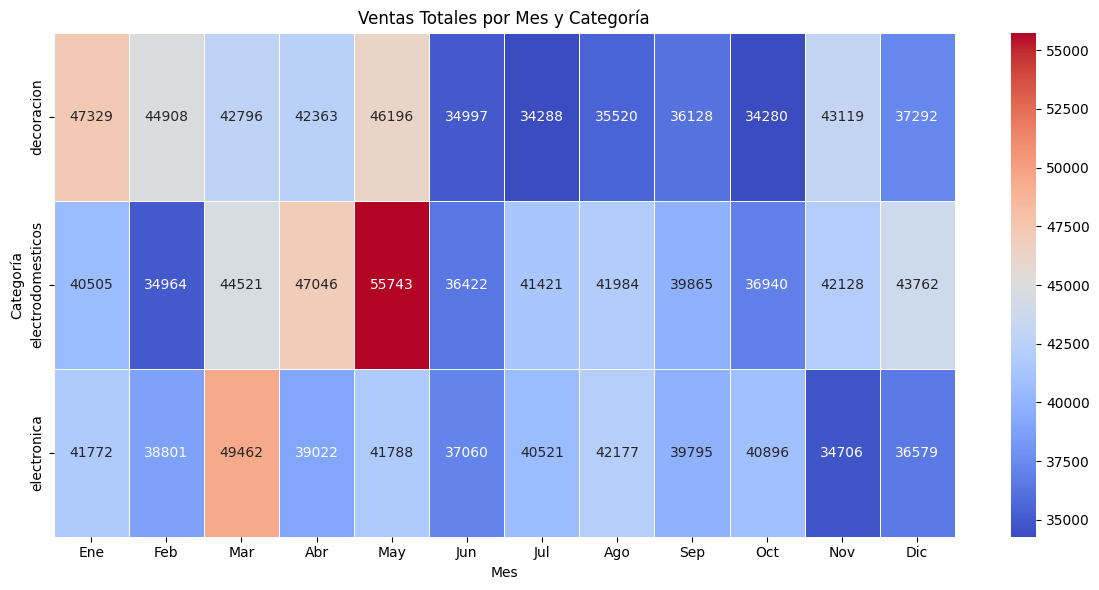

In [149]:
# Ventas Totales por Mes y Categoría

df_ventas_copy['mes'] = df_ventas_copy['fecha_venta'].dt.month

# Pivot por categoría y mes
pivot_cat_mes = df_ventas_copy.pivot_table(
    index='categoria',
    columns='mes',
    values='ingreso_total',
    aggfunc='sum'
).fillna(0)


mes_labels = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}
pivot_cat_mes.columns = [mes_labels[m] for m in pivot_cat_mes.columns]

plt.figure(figsize=(12,6))
sns.heatmap(pivot_cat_mes, cmap='coolwarm', linewidths=.5, annot=True, fmt='.0f')
plt.title("Ventas Totales por Mes y Categoría")
plt.xlabel("Mes")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

**4. Consolidación de Datos:
Consolidar todos los análisisprevios y preparar un conjunto de datos final que resuma loshallazgos clave para la presentación.**

In [178]:

print("\n------ KPIs del negocio ------\n")

total_ingreso = df_ventas_copy['ingreso_total'].sum()
total_ventas = df_ventas_copy['id_venta'].nunique()
ticket_promedio_global = total_ingreso / total_ventas


df_kpis_globales = pd.DataFrame({
    'KPI': [
        'total_ingreso',
        'total_ventas',
        'ticket_promedio_global',
        'media_ingreso',
        'mediana_ingreso',
        'desvio_ingreso'
    ],
    'Valor': [
        total_ingreso,
        total_ventas,
        ticket_promedio_global,
        media,
        mediana,
        desviacion_standard
    ]
    })

display(df_kpis_globales)

print("\n------ Resumen mensual ------\n")
df_ventas_copy['mes_periodo'] = df_ventas_copy['fecha_venta'].dt.to_period('M')

resumen_mensual = df_ventas_copy.groupby('mes_periodo').agg(
    cantidad_total=('cantidad', 'sum'),
    ingreso_total=('ingreso_total', 'sum'),
    ticket_promedio=('ingreso_total', lambda x: x.sum() / x.count())
).reset_index()

display(resumen_mensual)

print("\n------ Ranking: Top 10 productos por ingreso ------\n")

df_ingreso_por_producto = df_ventas_copy.groupby('producto')['ingreso_total'].sum().reset_index()
df_top10_ingreso = df_ingreso_por_producto.sort_values(by='ingreso_total', ascending=False).head(10)

display(df_top10_ingreso)

print("\n------ Productos de alto rendimiento (P80+) ------\n")
display(df_productos_alto_rendimiento)


print("\n------ Ingreso total y ticket promedio por categoría ------\n")
display(df_ticket_ordenado)


print("\n------ Desempeño por campaña de marketing ------\n")
display(df_campanhas_ordenado.head(10))

print("\n------ Desempeño por canal de marketing ------\n")
display(df_canal_ordenado)


------ KPIs del negocio ------



,KPI,Valor
0,total_ingreso,"1,467,093.52"
1,total_ventas,"2,998.00"
2,ticket_promedio_global,489.36
3,media_ingreso,489.36
4,mediana_ingreso,418.06
5,desvio_ingreso,334.23



------ Resumen mensual ------



,mes_periodo,cantidad_total,ingreso_total,ticket_promedio
0,2024-01,1741,"129,604.99",483.60
1,2024-02,1607,"118,672.44",478.52
2,2024-03,1792,"136,779.15",516.15
3,2024-04,1715,"128,430.69",467.02
4,2024-05,1812,"143,727.25",522.64
5,2024-06,1426,"108,480.17",490.86
6,2024-07,1547,"116,229.97",478.31
7,2024-08,1614,"119,680.15",471.18
8,2024-09,1576,"115,787.85",480.45
9,2024-10,1458,"112,117.13",487.47



------ Ranking: Top 10 productos por ingreso ------



,producto,ingreso_total
17,lampara de mesa,"82,276.38"
3,auriculares,"74,175.58"
20,microondas,"72,562.89"
5,cafetera,"59,607.31"
10,cuadro decorativo,"54,297.60"
26,smartphone,"54,132.44"
25,secadora,"52,115.45"
16,jarron decorativo,"51,130.88"
4,batidora,"50,979.20"
24,rincon de plantas,"50,456.45"



------ Productos de alto rendimiento (P80+) ------



,producto,ingreso
17,lampara de mesa,"82,276.38"
3,auriculares,"74,175.58"
20,microondas,"72,562.89"
5,cafetera,"59,607.31"
10,cuadro decorativo,"54,297.60"
26,smartphone,"54,132.44"



------ Ingreso total y ticket promedio por categoría ------



,categoria,ingreso_total,total_registros,ticket_promedio_venta
1,electrodomesticos,"505,299.63",1000,505.30
2,electronica,"482,577.80",998,483.54
0,decoracion,"479,216.09",1000,479.22



------ Desempeño por campaña de marketing ------



,id_campanha,ingreso_total,ventas
0,2,"82,276.38",176
1,32,"82,276.38",176
2,62,"82,276.38",176
3,77,"74,175.58",143
4,47,"74,175.58",143
5,17,"74,175.58",143
6,26,"72,562.89",135
7,56,"72,562.89",135
8,86,"72,562.89",135
9,19,"59,607.31",117



------ Desempeño por canal de marketing ------



,canal,ingreso_total,ventas
0,email,"1,467,093.52",2998
1,rrss,"1,467,093.52",2998
2,tv,"1,467,093.52",2998
